<a href="https://colab.research.google.com/github/Abdul2611/mushroom-classification-svm/blob/main/Svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [32]:
df.head(11)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
5,389,convex,grooves,pink,no,spicy,attached,crowded,broad,orange,...,universal,white,one,sheathing,white,scattered,woods,poisonous,4.337043,16.189338
6,330,bell,smooth,brown,no,anise,free,distant,broad,buff,...,partial,white,two,flaring,green,scattered,leaves,poisonous,12.702359,24.662015
7,98,conical,fibrous,white,yes,none,notched,close,narrow,black,...,partial,brown,one,large,orange,several,woods,poisonous,11.963690,19.408506
8,597,conical,grooves,green,yes,pungent,attached,crowded,narrow,buff,...,universal,yellow,two,evanescent,chocolate,solitary,woods,edible,14.272490,13.260537
9,16,convex,scaly,brown,yes,almond,attached,crowded,broad,red,...,partial,white,none,zone,green,clustered,leaves,poisonous,11.842597,4.216489


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [34]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [35]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1995,True
1996,False
1997,True
1998,True


In [36]:
df.drop_duplicates(inplace=True)
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [37]:
(df['class'].value_counts())

,count
class,
poisonous,618
edible,358


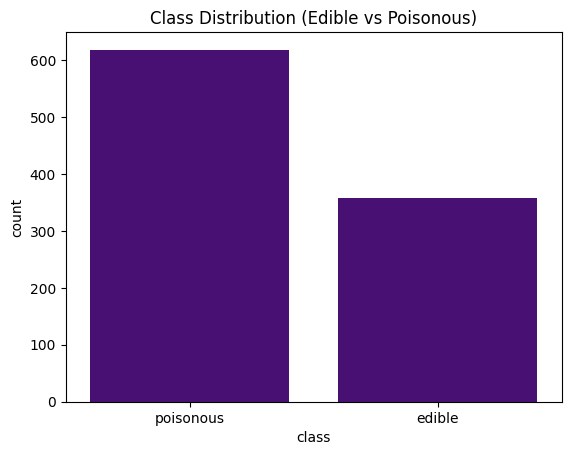

In [38]:
sns.countplot(x='class', data=df, color='indigo')
plt.title('Class Distribution (Edible vs Poisonous)')
plt.show()

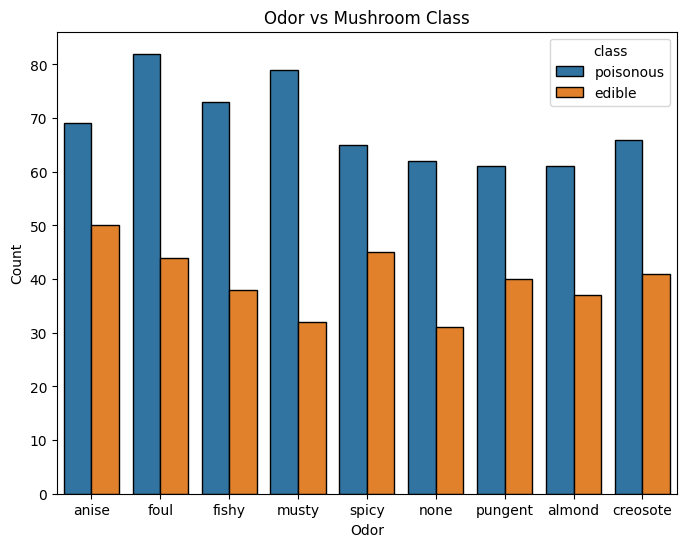

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='odor', hue='class',data=df, edgecolor='black')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.title('Odor vs Mushroom Class')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [41]:
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

In [42]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [43]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6326530612244898


In [45]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0  72]
 [  0 124]]


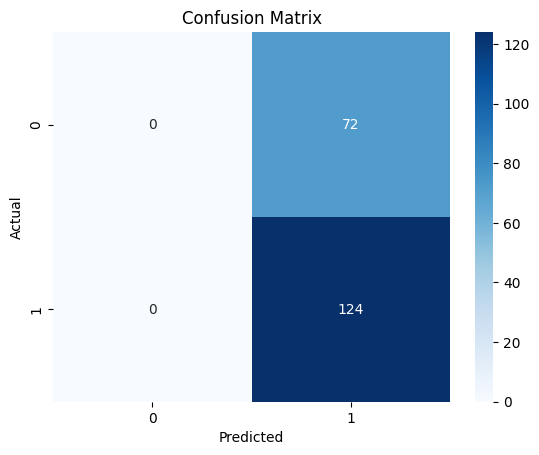

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d' ,cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
kernels = ['linear', 'poly', 'rbf']
results = {}
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[k] = acc

print("Kernel Comparison")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

Kernel Comparison
linear: 0.6327
poly: 0.6327
rbf: 0.6327


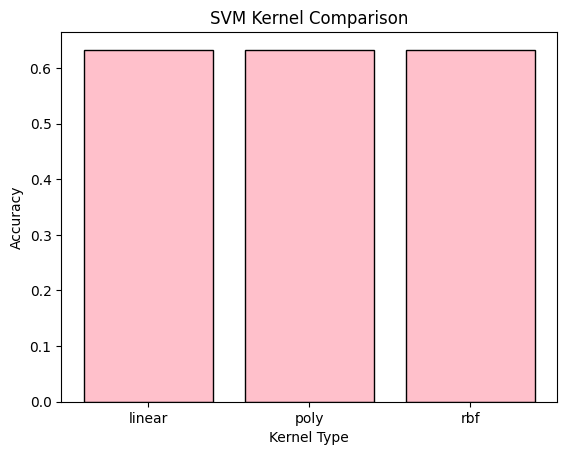

In [49]:
plt.bar(results.keys(), results.values(),color='pink',edgecolor='black')
plt.title('SVM Kernel Comparison')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.show()